In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import pandas as pd
import numpy as np
import anndata as ad

import scanpy as sc
import liana as li

import spatialdm as sdm

import matplotlib.pyplot as plt
print("Liana version: %s" %li.__version__)

Liana version: 1.2.1


In [6]:
### Load data

data_path = "/lustre/groups/ml01/datasets/2024_spatial_ccc_experiments_francesca.drummer/"
adata = ad.read_h5ad(f"{data_path}/dataset.h5ad")


In [13]:
adata.X = adata.layers["normalized"]
adata.var_names = adata.var["gene_symbol"]

In [14]:
adata

AnnData object with n_obs × n_vars = 37068 × 1122
    obs: 'brain_section_label', 'brain_section_label_right', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y', 'z', 'subclass_confidence_score', 'cluster_confidence_score', 'high_quality_transfer', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'dataset_id', 'sample_id', 'donor_id', 'condition_id', 'tissue', 'organism', 'assay_ontology', 'assay', 'celltype', 'fov'
    var: 'gene_symbol', 'name', 'mapped_ncbi_identifier'
    uns: 'log1p'
    obsm: 'spatial'
    layers: 'counts', 'normalized'

In [18]:
bandwidth=130
cutoff=0.01
li.ut.spatial_neighbors(adata, bandwidth=bandwidth, cutoff=cutoff, kernel='gaussian', set_diag=True)

In [21]:
li.rs.show_resources()

['baccin2019',
 'cellcall',
 'cellchatdb',
 'cellinker',
 'cellphonedb',
 'celltalkdb',
 'connectomedb2020',
 'consensus',
 'embrace',
 'guide2pharma',
 'hpmr',
 'icellnet',
 'italk',
 'kirouac2010',
 'lrdb',
 'mouseconsensus',
 'ramilowski2015']

In [23]:
# creating cellchatDB mouse
sdm.extract_lr(adata, species='mouse', min_cell=370)

In [ ]:
ligand_receptor = adata.uns["receptor"].index.tolist()
ligands = [s.split("_")[0] for s in ligand_receptor]
receptors = [s.split("_")[1] for s in ligand_receptor]

resource = pd.DataFrame()
resource["ligand"] = ligands
resource["receptor"] = receptors

In [ ]:
li.mt.bivariate(adata,
                #resource_name='', # NOTE: uses HUMAN gene symbols!
                resource=resource,
                local_name='morans', # Name of the function
                global_name="morans", # Name global function
                n_perms=100, # Number of permutations to calculate a p-value
                mask_negatives=False, # Whether to mask LowLow/NegativeNegative interactions
                add_categories=True, # Whether to add local categories to the results
                nz_prop=0.2, # Minimum expr. proportion for ligands/receptors and their subunits
                use_raw=False,
                verbose=True
                _)

In [ ]:
lrdata = adata.obsm['local_scores']

In [51]:
spaialdm_lr = ["_".join(lr.split("^")) for lr in lrdata.var_names]

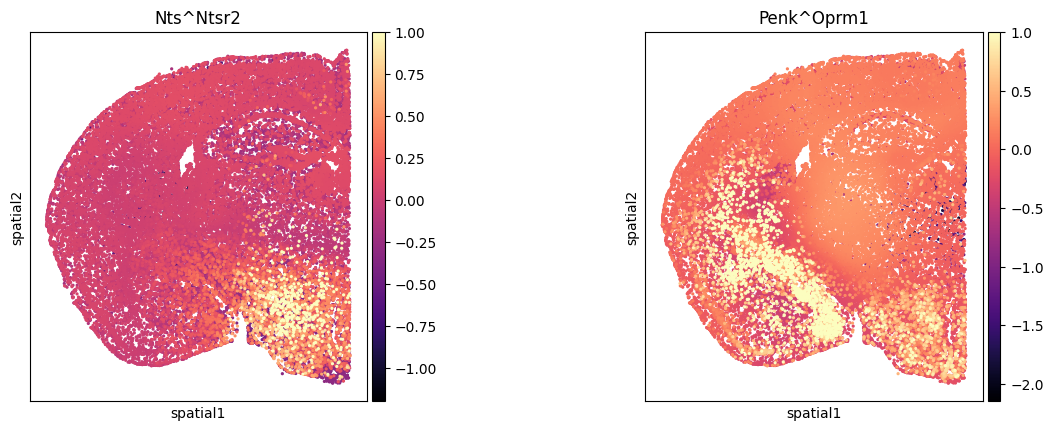

In [46]:
sc.pl.spatial(lrdata, color=['Nts^Ntsr2', 'Penk^Oprm1'], size=1.4, vmax=1, cmap='magma', spot_size=0.04)